# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [2]:
# Import the titanic dataset here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")
df_titanic.head()

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1


## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [3]:
# Code here
passengers = df_titanic[df_titanic['class'].isin(['1st', '2nd', '3rd'])]
passengers



,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.1100,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.0500,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.0500,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.0500,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.1300,1
...,...,...,...,...,...,...,...,...,...
1314,"Yvois, Miss. Henriette",female,24.0,2nd,S,France,248747.0,13.0000,0
1315,"Zakarian, Mr. Mapriededer",male,22.0,3rd,C,Turkey,2656.0,7.0406,0
1316,"Zakarian, Mr. Ortin",male,27.0,3rd,C,Turkey,2670.0,7.0406,0
1317,"Zenni, Mr. Philip",male,25.0,3rd,C,Lebanon,2620.0,7.0406,1


In [4]:
joint = pd.crosstab(passengers['class'], passengers['embarked'], normalize = True)
joint

embarked,B,C,Q,S
class,,,,
1st,0.002278,0.108580,0.002278,0.132878
2nd,0.004556,0.019742,0.005315,0.186029
3rd,0.000000,0.077449,0.085801,0.375095


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [5]:
# Code here
embarked_given_class = joint.div(joint.sum(axis=1), axis=0) # this is using the .div function which divides each value in joint by the sum of its row in the contingency table using (joint.sum(axis=1)), which is the sum of all embarked probabailities for the given class. axis = 0 means that the division is happening horizontally, from left to right, where each value (say 1st class and B) is divided by the sum of the 1st class row.
embarked_given_class # this is a conditional distribution table that provides the proportion of passengers who embarked from a specific location, given that they are in a certain class - for example, the value 0.0.077449 (3rd, C) is the proportion of people who embarked from Cherbourg given they were in 3rd class



embarked,B,C,Q,S
class,,,,
1st,0.009259,0.441358,0.009259,0.540123
2nd,0.021127,0.091549,0.024648,0.862676
3rd,0.000000,0.143865,0.159379,0.696756


Given that a passenger was in the 3rd class, the proportion that embarked at Southampton was 0.696


In [6]:
class_given_embarked = joint.div(joint.sum(axis=0), axis=1)
class_given_embarked # this is a conditional distribution table that provides the proportion of passengers who were in a certain class, given that they embarked from a specific location - we know this because the given part is the column totals (as opposed to row totals), that each value of class is being divided by in the original contingency table

embarked,B,C,Q,S
class,,,,
1st,0.333333,0.527675,0.024390,0.191466
2nd,0.666667,0.095941,0.056911,0.268053
3rd,0.000000,0.376384,0.918699,0.540481


Given that a passenger embarked at Southampton, the proportion that were in the 3rd class was 0.54


## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

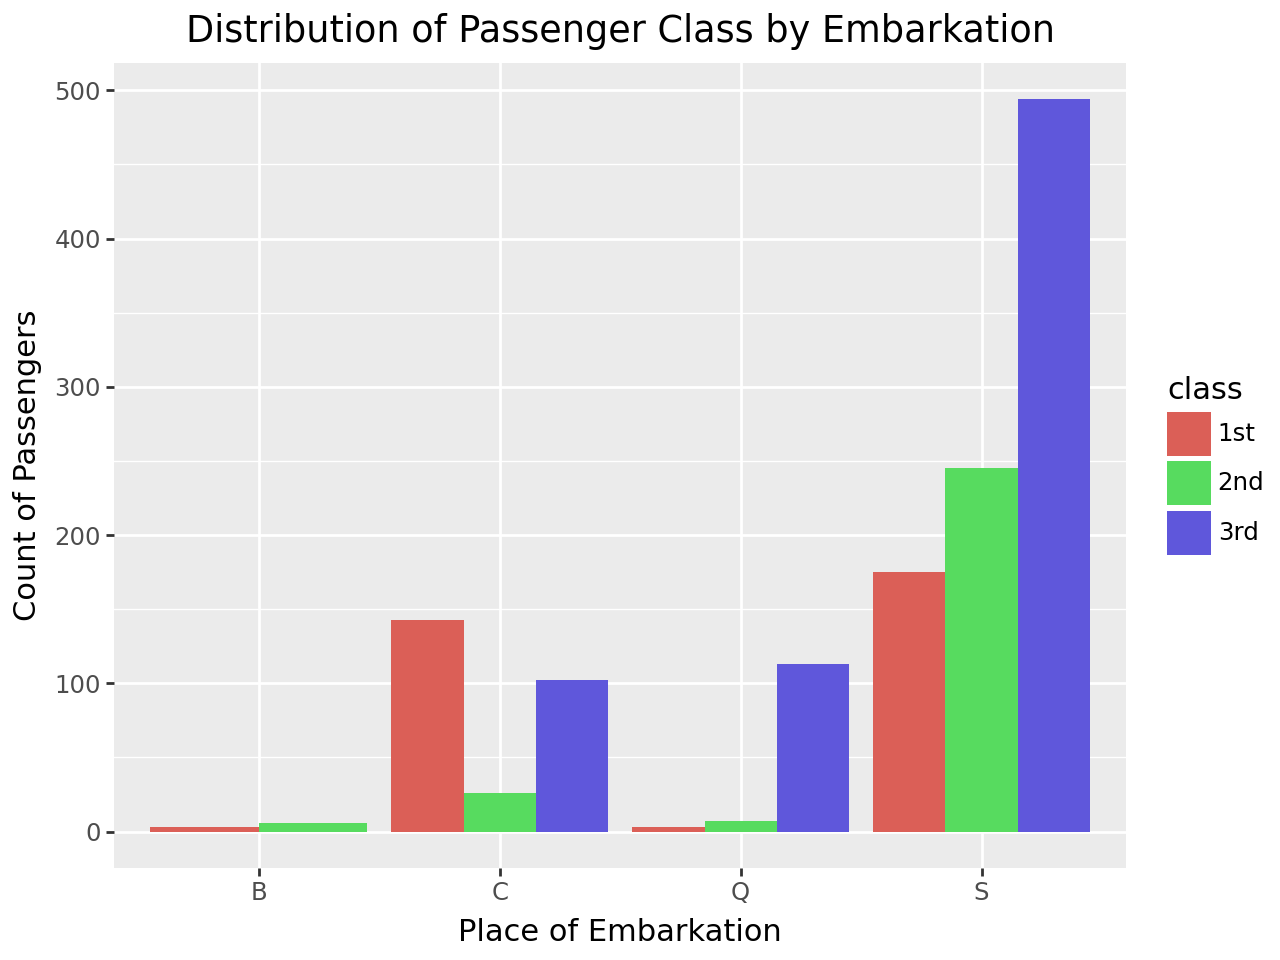

In [18]:
# Code here
from plotnine import *
(
    ggplot((passengers), aes(x='embarked', fill = 'class'))
    + geom_bar(position='dodge')
    + labs(x = "Place of Embarkation", y ="Count of Passengers", title = "Distribution of Passenger Class by Embarkation")


)



One benefit of this visualization is that you can see the actual counts of passengers in each class from each embarked location. I think this is better than showing distributions of passengers because seeing counts are more important than distributions. For example, Port B would have about a 55/45 distribution for 2nd and 1st classes, but you would not know that Port B has a miniscule amount of passengers overall. The distributions calculated previously show the proportion of a certain class or place of embarkation in relation to the sum of its own variable. This visual shows the proportion in relation to all other levels of both variables. One drawback is that you cannot see the proportions of each level of 'embarked' or 'class', but you can get a good idea visually.